**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job! I didn't find any issues that would require to send the project back, but please check my comment at the end about using train and test set scores. The project is accepted. Keep up the great work on the next sprint!

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

## Initialization

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load Data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

### Overview of Data

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [6]:
df_reviews.head(10)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
5,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,This is the first movie I've seen from Singapo...,9,pos,1,test,9282
6,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Yes non-Singaporean's can't see what's the big...,9,pos,1,test,9283
7,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,This true story of Carlson's Raiders is more o...,2,neg,0,train,9903
8,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,Should have been titled 'Balderdash!' Little i...,2,neg,0,train,9905
9,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,The movie 'Gung Ho!': The Story of Carlson's M...,4,neg,0,train,9904


#### Check for duplicates

In [7]:
df_reviews.duplicated().sum()

0

No duplicate rows.

#### Check for missing values

In [8]:
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

There are two missing values in each the `average_rating` and `votes` column.

In [9]:
df_reviews[df_reviews.isna().any(axis=1)]

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22280,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"This is a truly great film, with excellent dir...",9,pos,1,test,3231
22281,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"A film is beyond all expectations, an excellen...",10,pos,1,test,3232


In [10]:
df_reviews.query("primary_title == 'Mila Ass Painting'")

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22280,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"This is a truly great film, with excellent dir...",9,pos,1,test,3231
22281,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"A film is beyond all expectations, an excellen...",10,pos,1,test,3232


The missing values belong to the only two entries of the the 1998 movie *Mila Ass Painting*. Both represent positive reviews within the test set, but because the movie only has the two entries - we cannot fill the missing values with metrics drawn only from the same film.

Though it means reducing the test data set by 2, we will remove the entries to preserve the data as a whole. This shouldn't make much of an impact as there are 47,331 rows of data in our initial set, so 2 rows removed is relative inconsequential if it means ensuring integrity and preventing potential issues.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Sure! But we may not even use all these columns in our models :)

</div>

In [11]:
df_reviews = df_reviews.dropna()

In [12]:
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     0
votes              0
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

We have no more missing values after removing the two rows that contained them.

### Targeted observation of certain columns

#### `end_year` observation

`end_year` appears in out initial observation to not be used in the top 10 rows of the data. We will call up the unique values within to see whether or not there are values beyond `\N`.

In [13]:
df_reviews['end_year'].unique()

array(['\\N', '1999', '2008', '2005', '1987', '1981', '1990', '2009',
       '1985', '1986', '2004', '2002', '1994', '2007', '1996', '1960',
       '2000', '2012', '2010', '2013', '1980', '2003', '2001', '2011',
       '1978', '2006', '1973', '2017', '1997', '1998', '1984', '1983',
       '1995', '1974', '1970', '1989', '2020', '1988', '1979', '1993',
       '2018', '1977', '1968', '2014', '1975', '1962', '1972', '1976',
       '2016', '1955', '1965', '1982', '1961', '1991', '1969', '1966',
       '1957', '2019', '1953', '1959'], dtype=object)

In [14]:
list = ['1999', '2008', '2005', '1987', '1981', '1990', '2009', '1985', '1986', '2004', '2002', '1994', '2007', '1996', '1960', '2000', '2012', '2010', '2013', '1980', '2003', '2001', '2011', '1978', '2006', '1973', '2017', '1997', '1998', '1984', '1983', '1995', '1974', '1970', '1989', '2020', '1988', '1979', '1993', '2018', '1977', '1968', '2014', '1975', '1962', '1972', '1976', '2016', '1955', '1965', '1982', '1961', '1991', '1969', '1966', '1957', '2019', '1953', '1959']
with_end_year = df_reviews[df_reviews['end_year'].isin(list)]
with_end_year['title_type'].unique()

array(['tvSeries', 'tvMiniSeries'], dtype=object)

The rows that have entires other than `\N` in `end_year` are tvSeries of some nature, which makes sense as they aren't represented by a single release but do have runtimes for seasons/series released over a larger span of time.

#### `runtime_minutes` observation

Like our previous column, `runtime_minutes` shows that the top ten results are all represented with a `\N` designation. We will look to see whaat other values are within the column.

In [15]:
df_reviews['runtime_minutes'].unique()

array(['121', '25', '88', '85', '90', '113', '96', '99', '43', '82', '74',
       '100', '95', '129', '60', '92', '98', '104', '94', '116', '102',
       '141', '89', '120', '180', '97', '107', '87', '44', '149', '130',
       '40', '45', '84', '30', '\\N', '70', '126', '110', '93', '80',
       '78', '8', '118', '123', '106', '79', '109', '112', '139', '117',
       '46', '135', '31', '12', '1', '72', '58', '77', '150', '7', '101',
       '91', '138', '10', '108', '105', '61', '69', '152', '47', '65',
       '23', '119', '374', '225', '66', '71', '15', '114', '83', '20',
       '301', '216', '148', '155', '251', '67', '177', '103', '62', '81',
       '111', '140', '125', '122', '124', '76', '146', '42', '50', '400',
       '73', '115', '75', '200', '22', '133', '160', '86', '21', '128',
       '230', '29', '162', '127', '147', '53', '13', '151', '9', '278',
       '179', '63', '137', '59', '165', '1140', '263', '54', '143', '183',
       '131', '51', '157', '132', '64', '57', '11', '4

There are numerous runtimes entered throughout the dataset, so the column retains relevance for some of the data. This column will remain unaltered.

#### `genres` observation

Like our two previous targeted observations, `genres` shows that the top ten results are all represented with a \N designation. We will look to see whaat other values are within the column.

In [16]:
df_reviews['genres'].unique()

array(['Comedy,Crime,Drama', 'Comedy,Drama,Short', 'Drama,History,War',
       'Crime,Drama,Thriller', 'Action,Crime,Drama', 'Comedy,Romance',
       'Drama', 'Adventure,Drama,Fantasy', 'Comedy', 'Comedy,Drama',
       'Adventure,Animation,Comedy', 'Adventure,Comedy,Family',
       'Horror,Thriller', 'Mystery,Sci-Fi,Thriller', 'Crime,Drama,Horror',
       'Comedy,Fantasy,Romance', 'Action,Biography,Drama',
       'Fantasy,Horror,Mystery', 'Crime,Drama', 'Drama,Family,History',
       'Action,Drama', 'Drama,Sci-Fi', 'Comedy,Drama,Fantasy', 'Action',
       'Biography,Comedy,Romance', 'Action,Adventure,Drama',
       'Adventure,Sci-Fi', 'News', 'Drama,Sci-Fi,Thriller',
       'Comedy,Drama,Romance', 'Crime,Drama,Mystery',
       'Action,Comedy,Family', 'Documentary,Reality-TV', 'Documentary',
       'Biography,Documentary,Romance', 'Drama,Mystery,Sci-Fi',
       'Action,Horror,Romance', 'Drama,Music', 'Horror', 'Comedy,Fantasy',
       'Action,Western', 'Musical,Short', 'Mystery,Thriller

There are numerous `genres` provided in the dataset. We will not change the data in this column.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

## EDA

Let's check the number of movies and reviews over years.

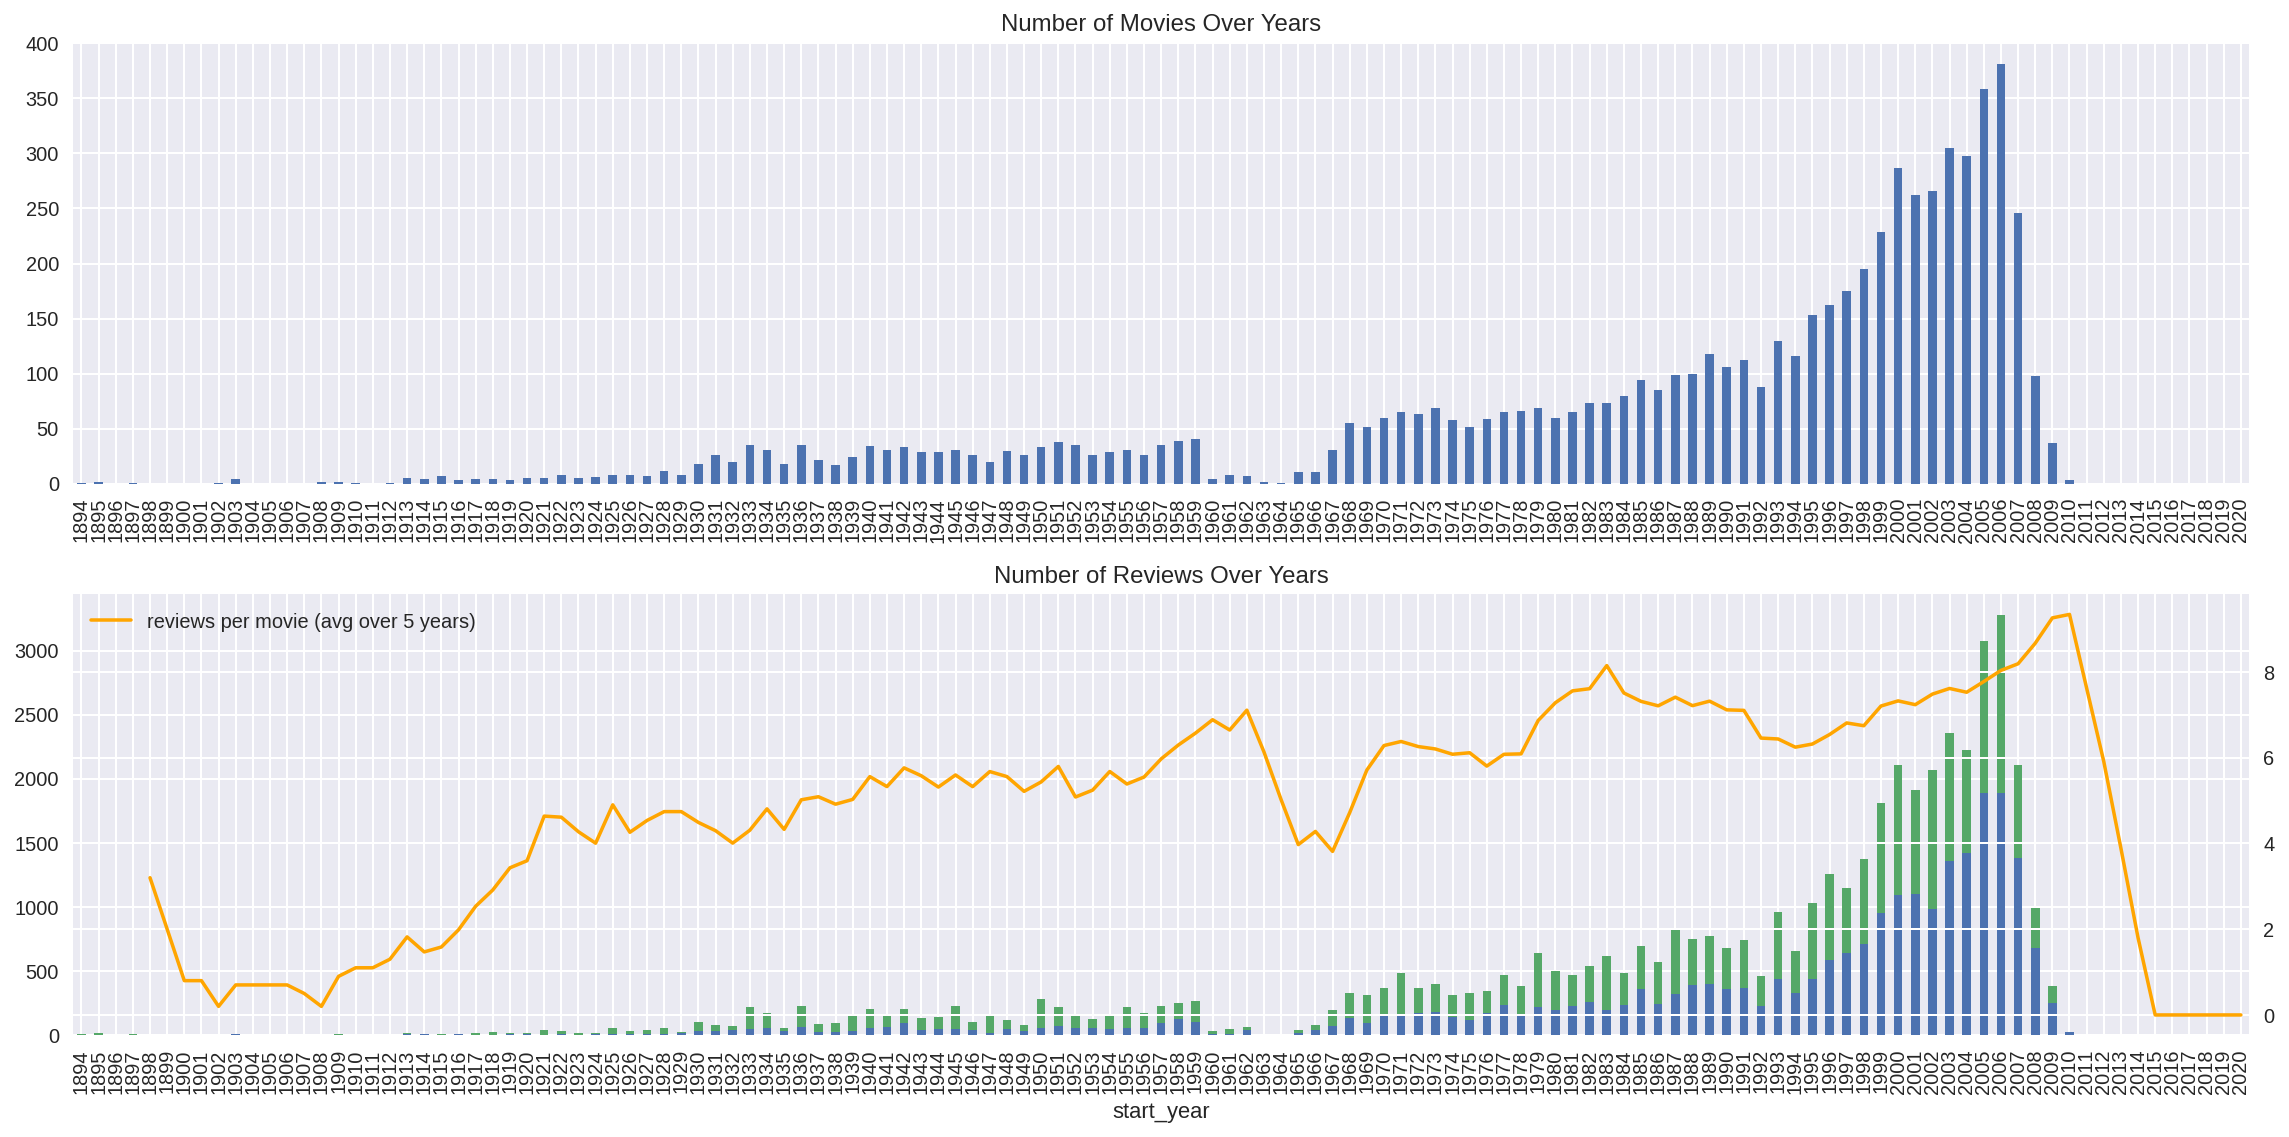

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

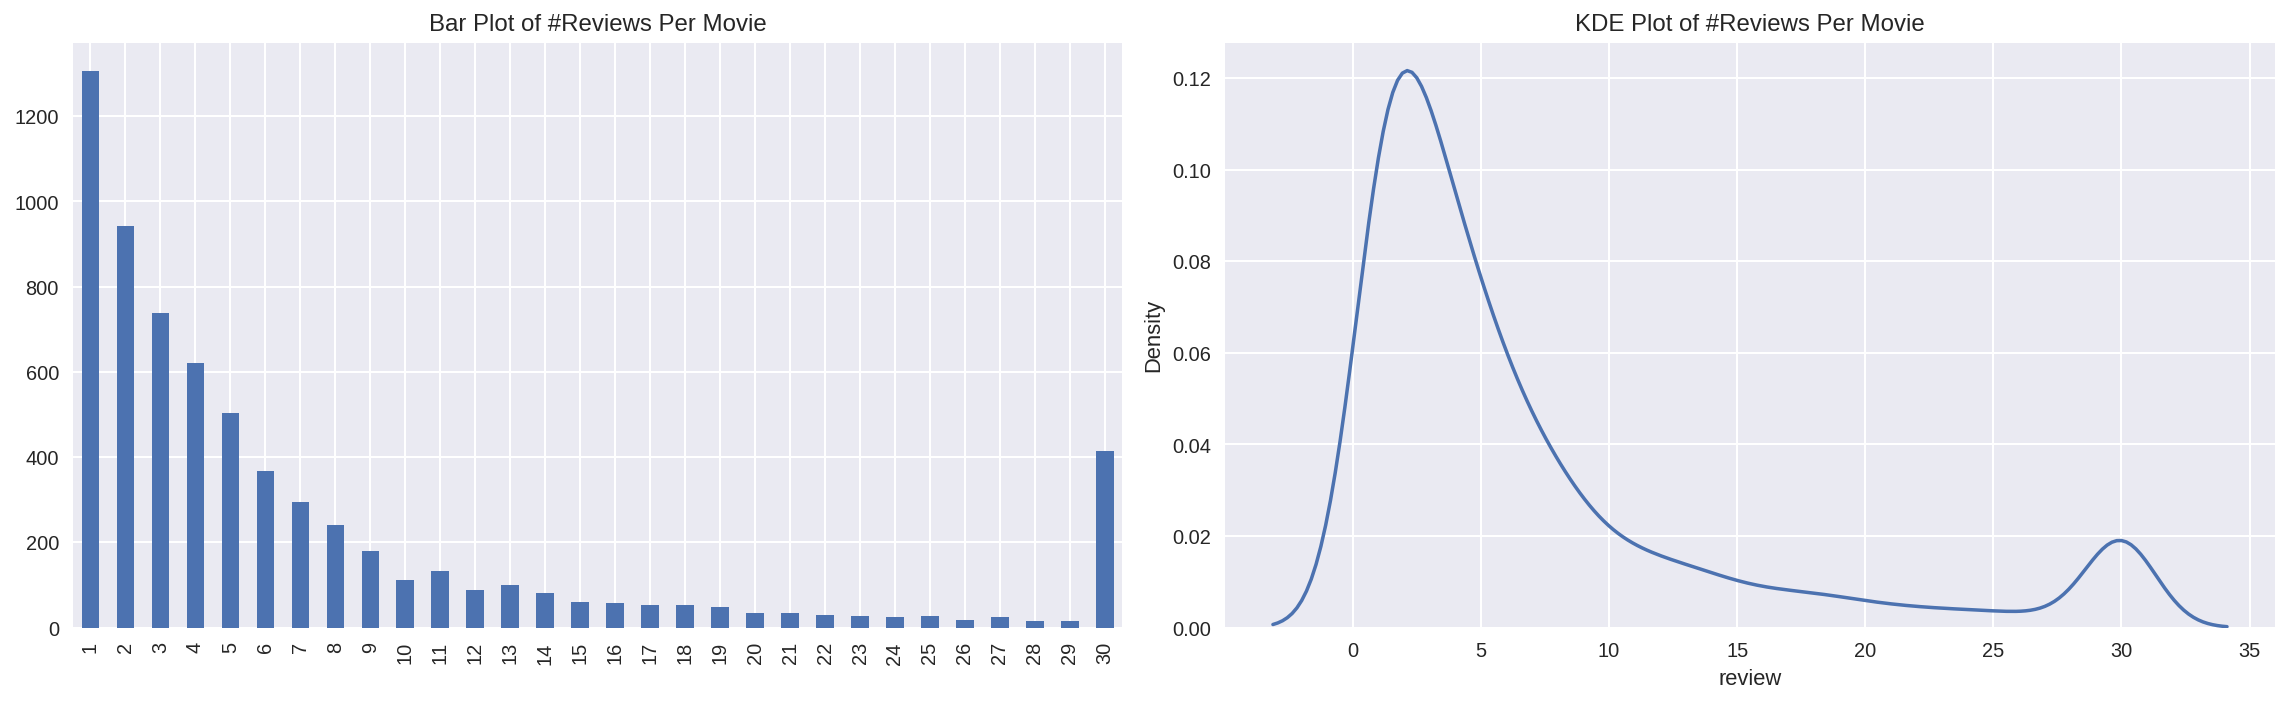

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

It is more common for movies to recieve fewer reviews, with the peak number at one per movie, decreasing in number until there is a spike at 30 reviews per movie. This could represent big releases that recieved a lot of press coverage and advertising, which would logically be reviewed more than typical releases.

In [19]:
df_reviews['pos'].value_counts()

0    23715
1    23614
Name: pos, dtype: int64

There is a good balance from the `pos` column which represents positive reviews, value = 1, and negative reviews, value = 0.

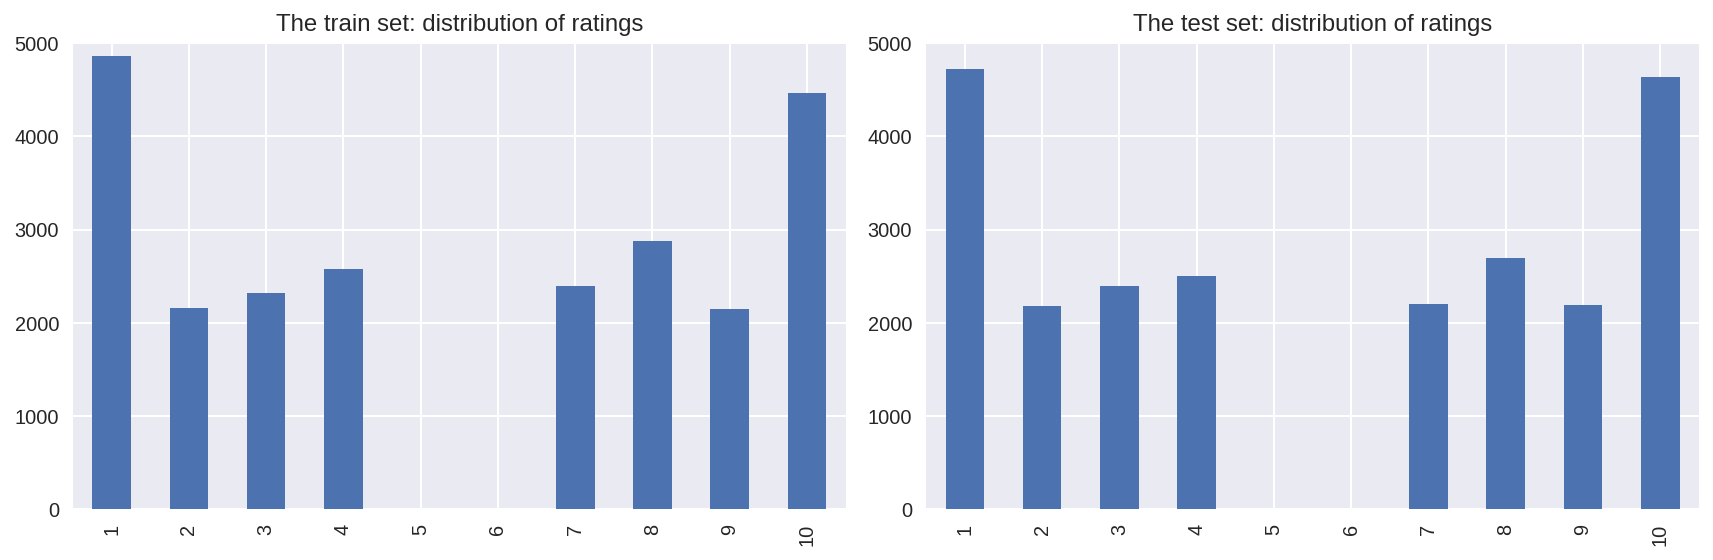

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

Distribution of negative and positive reviews over the years for two parts of the dataset.

There appears to be a relatively equal representation of both positive and negative reviews with roughly the same distribution between the training and testing data sets.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


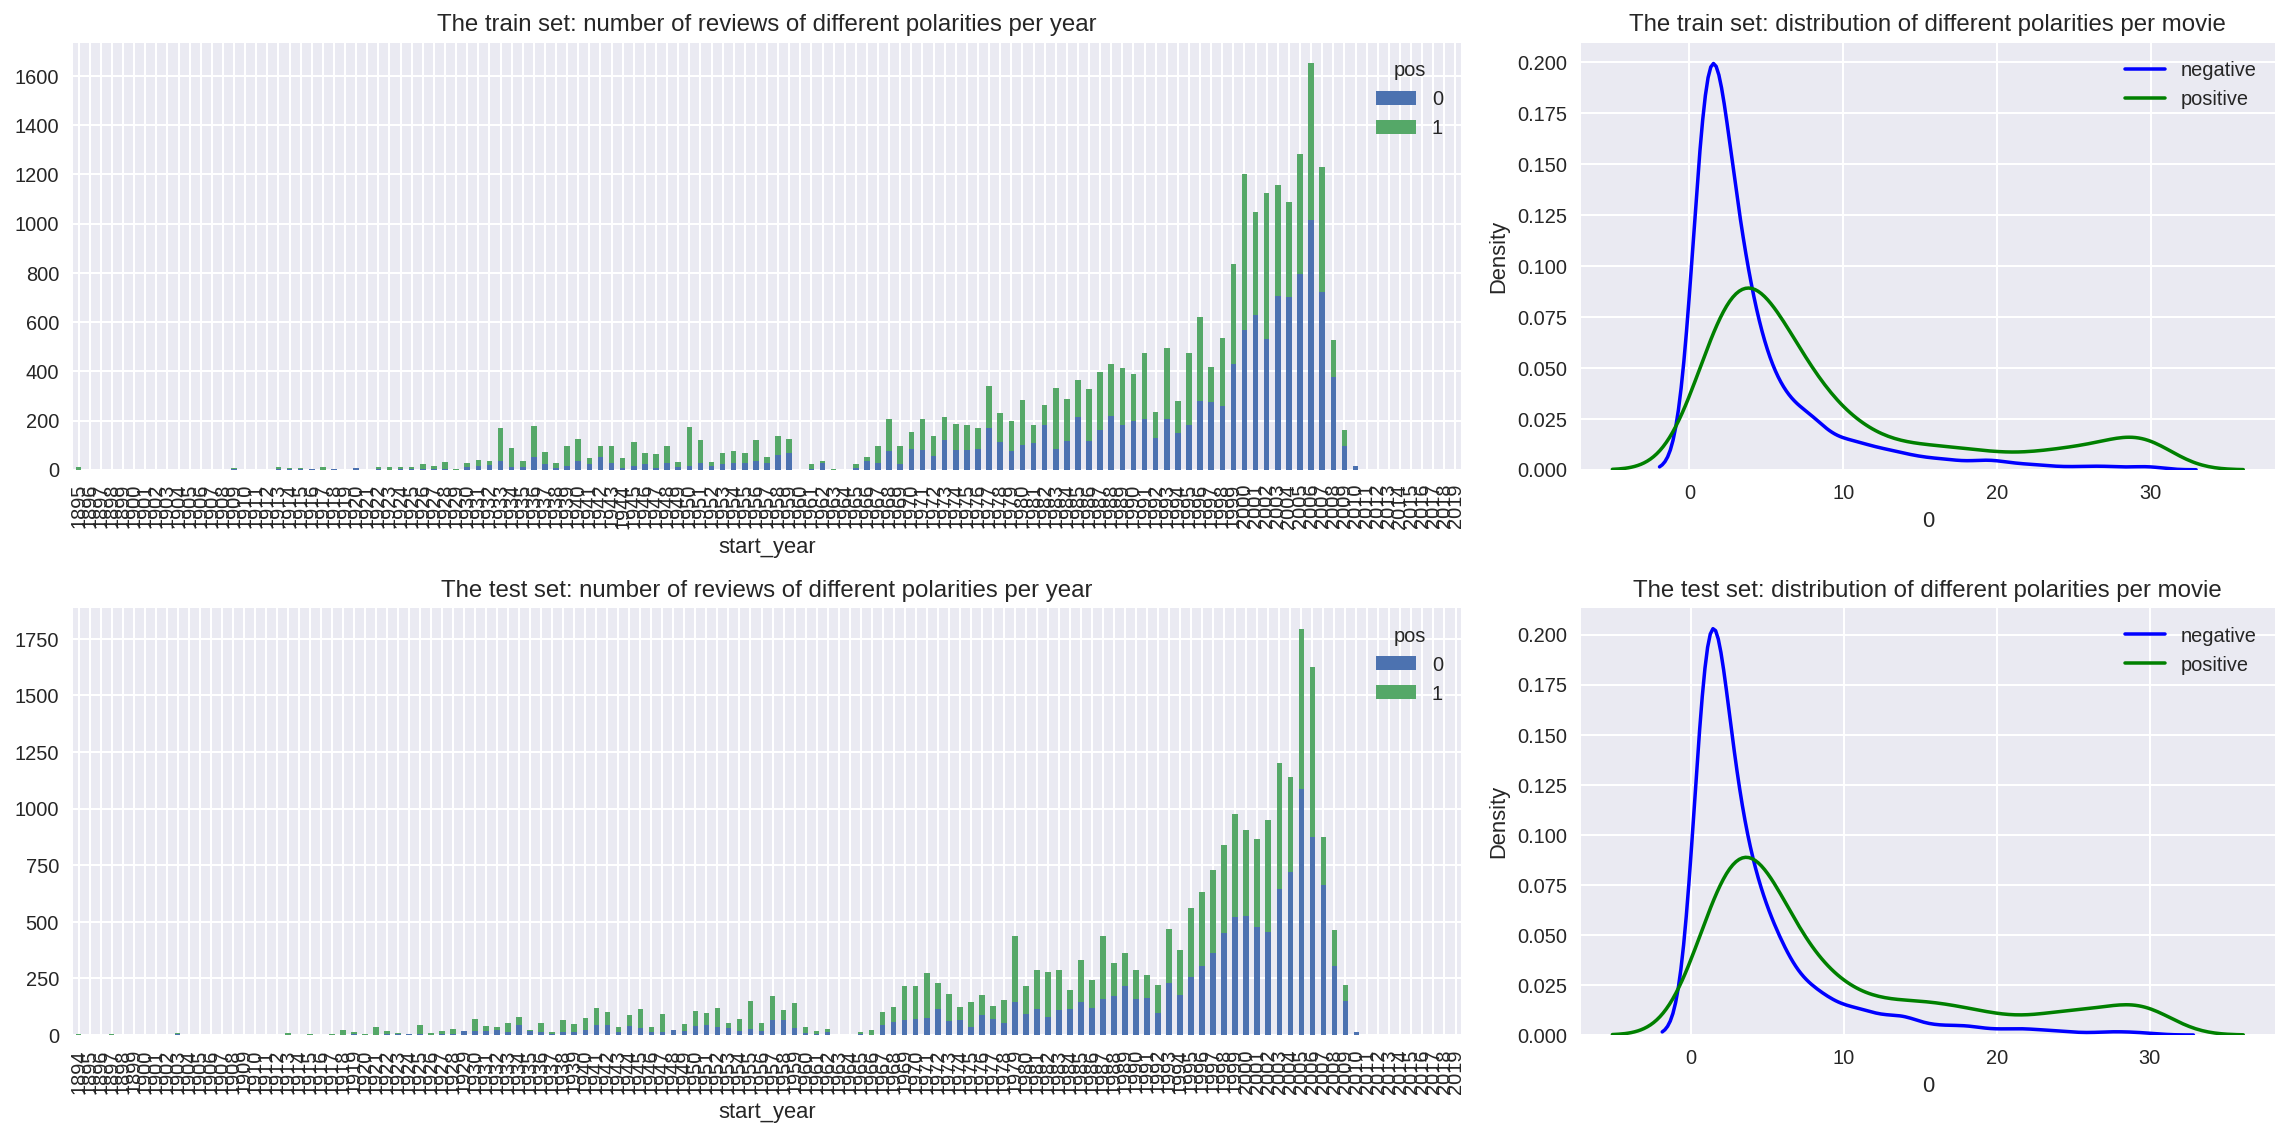

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

With minor differences, such as more movies in the test set in the late 1990's and more movies in the training set in the early 2000's - the distribution of the positive and negative reviews of the training and testing sets is very close, which should aid in the creation of a model and effective testing.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you explored the data and made some interesting observations!

</div>

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [22]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [23]:
import re

def norm_text(text):
    
    pattern = r"[^a-z']"
    words = text.lower()
    words = re.sub(pattern, " ", words)
    words = words.split()
    words = " ".join(words)
    return words

In [24]:
review_norm = []

for row in df_reviews['review']:
    review_norm.append(norm_text(row))

In [25]:
df_reviews['review_norm'] = review_norm

<div class="alert alert-success">
<b>Reviewer's comment</b>

Normalization looks good!

</div>

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [26]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23533, 18)


## Working with models

### Model 0 - Constant

In [27]:
from sklearn.dummy import DummyClassifier

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


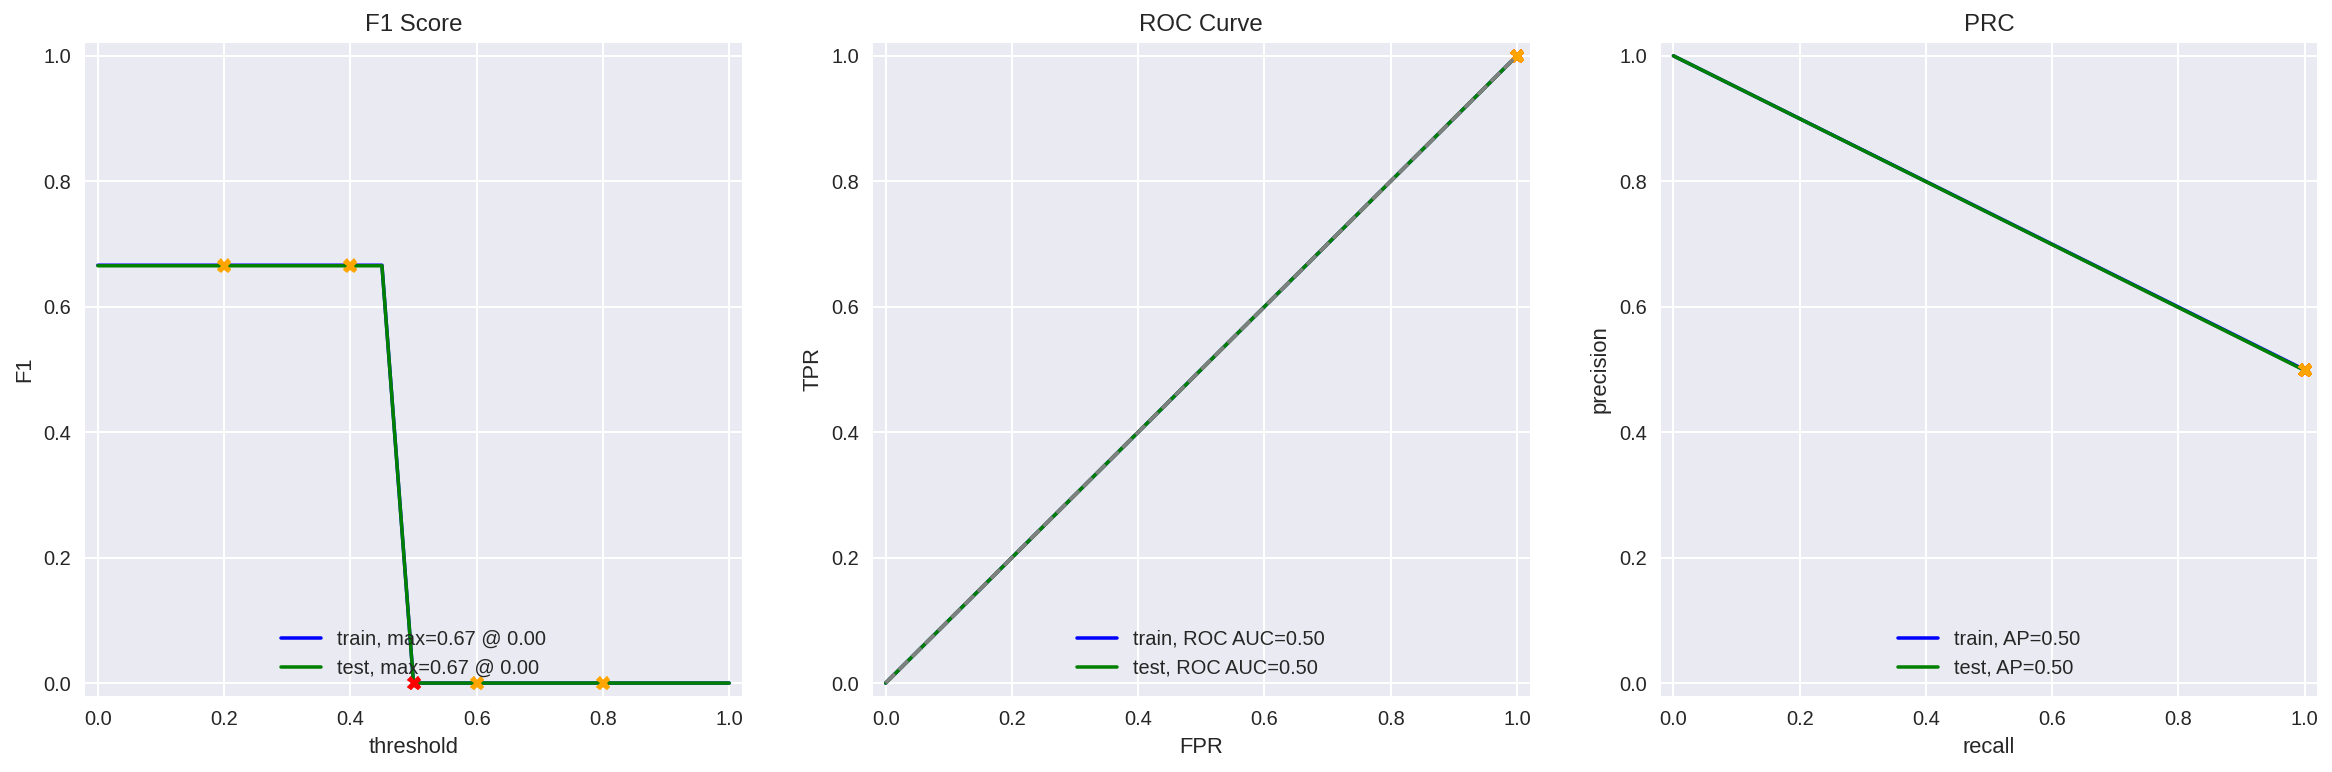

In [28]:
model_0 = DummyClassifier()

model_0.fit(df_reviews_train, train_target)
evaluate_model(model_0, df_reviews_train, train_target, df_reviews_test, test_target)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good to have a very simple baseline!

</div>

### Model 2 - NLTK, TF-IDF and LR

*Labeled as Model 1 in precode - changed to align with model designations in `My Reviews` section.*

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok!

</div>

TF-IDF

In [29]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [30]:
# Natural Language Toolkit
# Term Frequency - Inverse Document Frequency (Vectorization)
# Logistic Regression

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
corpus = df_reviews_train['review_norm']

stop_words = set(stopwords.words('english'))
tfidf_vectorizer_2 = TfidfVectorizer(stop_words=stop_words) 
tfidf_vectorizer_2.fit_transform(corpus)

train_features_2 = tfidf_vectorizer_2.transform(df_reviews_train['review_norm'])
test_features_2 = tfidf_vectorizer_2.transform(df_reviews_test['review_norm'])

In [33]:
display(train_features_2.shape)
display(train_target.shape) 
display(test_features_2.shape) 
display(test_target.shape)

(23796, 71531)

(23796,)

(23533, 71531)

(23533,)

In [34]:
model_2 = LogisticRegression()
model_2.fit(train_features_2, train_target)

LogisticRegression()

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


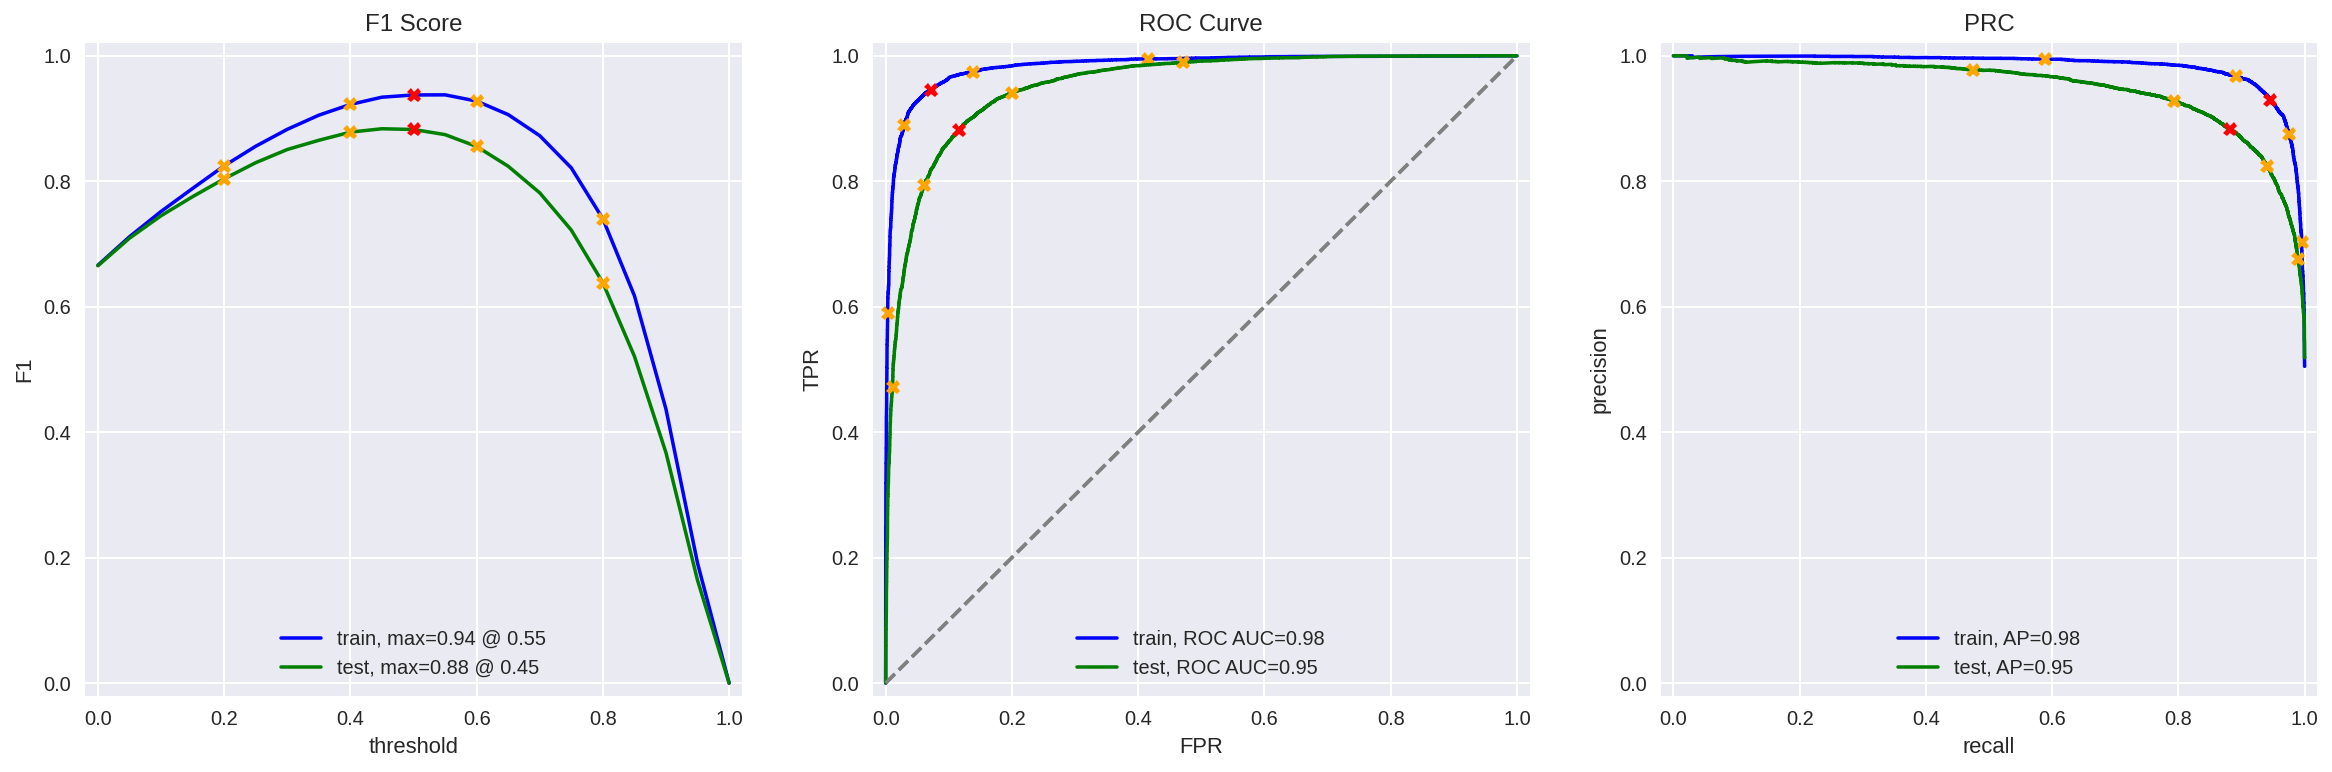

In [35]:
evaluate_model(model_2, train_features_2, train_target, test_features_2, test_target)

### Model 3 - spaCy, TF-IDF and LR

In [36]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [37]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [38]:
# spaCy library
# Term Frequency - Inverse Document Frequency (Vectorization)
# Logistic Regression

In [39]:
train_features_3 = df_reviews_train['review'].apply(text_preprocessing_3)
test_features_3 = df_reviews_test['review'].apply(text_preprocessing_3)

In [40]:
corpus = train_features_3

tfidf_vectorizer_3 = TfidfVectorizer() 
tfidf_vectorizer_3.fit_transform(corpus)

train_features_3 = tfidf_vectorizer_3.transform(train_features_3)
test_features_3 = tfidf_vectorizer_3.transform(test_features_3)

In [41]:
display(train_features_3.shape)
display(train_target.shape) 
display(test_features_3.shape) 
display(test_target.shape)

(23796, 62878)

(23796,)

(23533, 62878)

(23533,)

In [42]:
model_3 = LogisticRegression()
model_3.fit(train_features_3, train_target)

LogisticRegression()

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


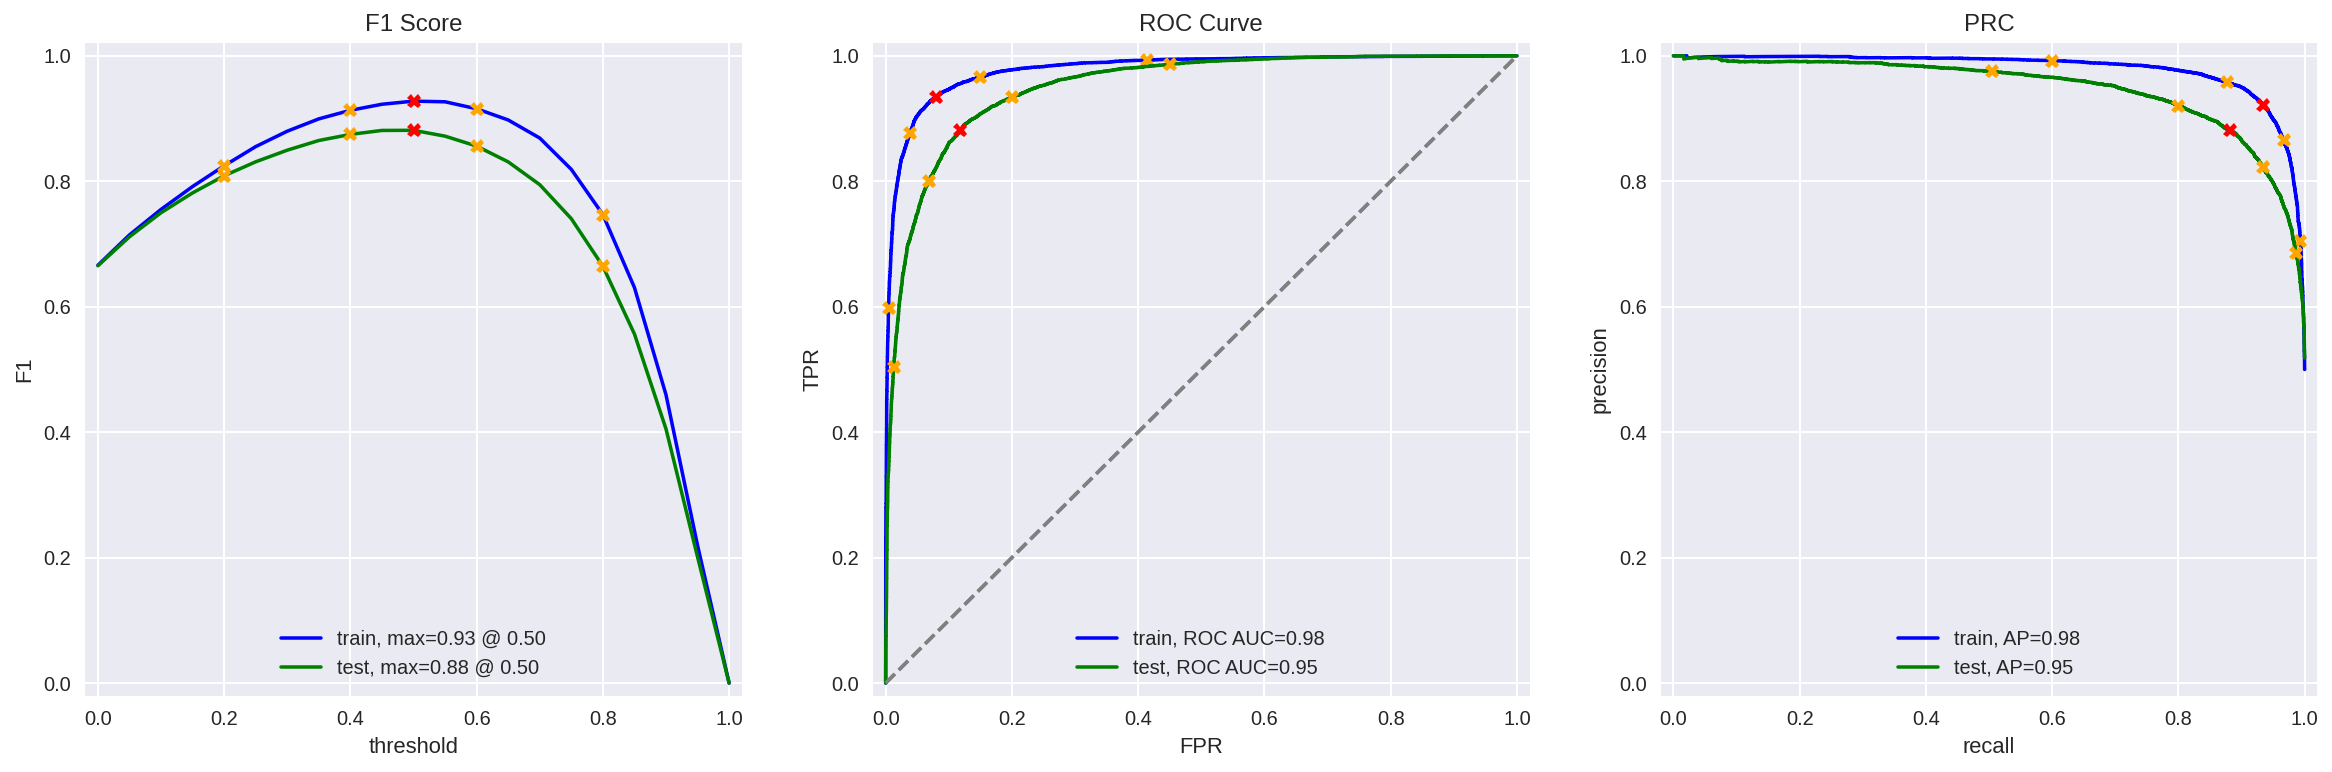

In [43]:
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [44]:
from lightgbm import LGBMClassifier

In [45]:
### Copy previous model train and test features as the method of producing them for model 4 is the same
train_features_4 = train_features_3.copy()
test_features_4 = test_features_3.copy()

In [46]:
model_4 = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.3, n_estimators=100, random_state=759638)
model_4.fit(train_features_4, train_target)

LGBMClassifier(learning_rate=0.3, random_state=759638)

          train  test
Accuracy   0.98  0.87
F1         0.98  0.87
APS        1.00  0.94
ROC AUC    1.00  0.94


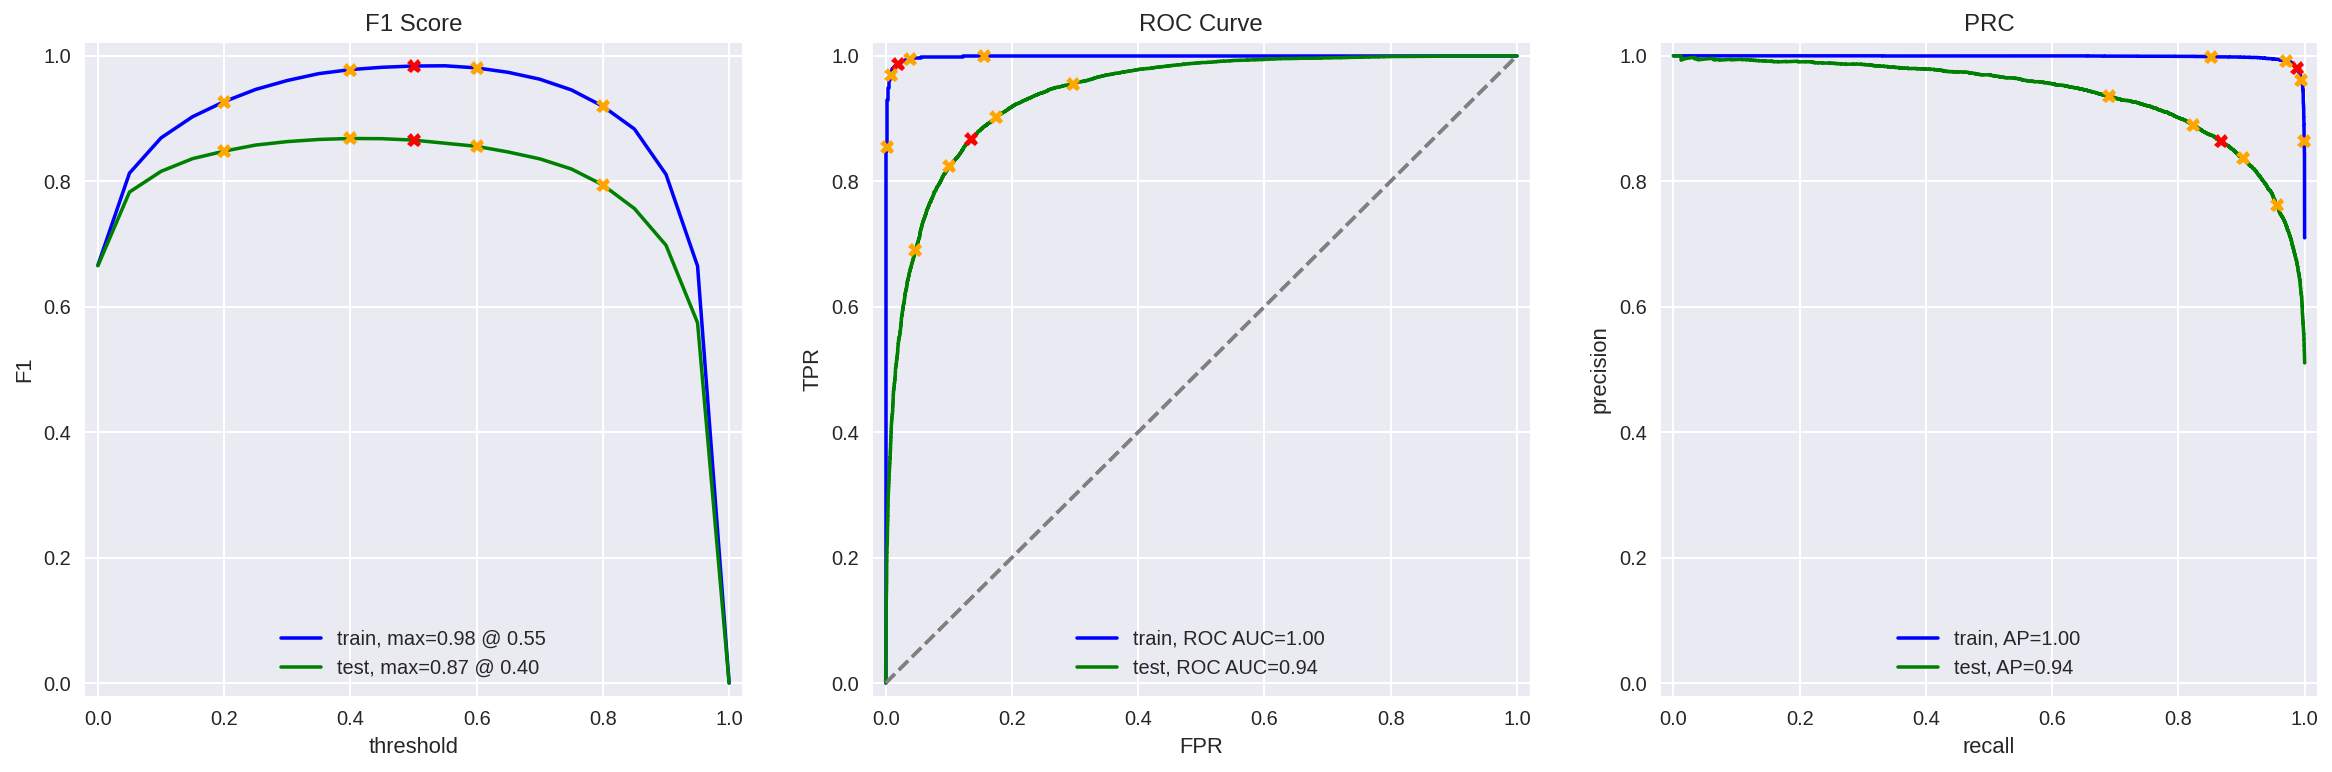

In [47]:
evaluate_model(model_4, train_features_4, train_target, test_features_4, test_target)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you successfully vectorized text data using TF-IDF and trained a couple of different models using the resulting features. It's nice that you tried lemmatization!

</div>

###  Model 9 - BERT

*Abstaaining from using the BERT model this project - kept the blocked off precode*

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok! If you want to try it, you can use google colab or kaggle notebooks (both platforms give you a notebook environment with a GPU for free)

</div>

In [48]:
# import torch
# import transformers

In [49]:
# tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
# config = transformers.BertConfig.from_pretrained('bert-base-uncased')
# model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [50]:
# def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
#     
#     ids_list = []
#     attention_mask_list = []
# 
#     # text to padded ids of tokens along with their attention masks
#     
#     # <put your code here to create ids_list and attention_mask_list>
#     
#     if force_device is not None:
#         device = torch.device(force_device)
#     else:
#         device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#         
#     model.to(device)
#     if not disable_progress_bar:
#         print(f'Using the {device} device.')
#     
#     # gettings embeddings in batches
# 
#     embeddings = []
# 
#     for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
#             
#         ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
#         # <put your code here to create attention_mask_batch
#             
#         with torch.no_grad():            
#             model.eval()
#             batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
#         embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
#         
#     return np.concatenate(embeddings)

In [51]:
# # Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
# train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

In [52]:
# print(df_reviews_train['review_norm'].shape)
# print(train_features_9.shape)
# print(train_target.shape)

In [53]:
# if you have got the embeddings, it's advisable to save them to have them ready if 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# and load...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

## My Reviews

In [54]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

review_norm = []

for row in my_reviews['review']:
    review_norm.append(norm_text(row))

my_reviews['review_norm'] = review_norm # <put here the same normalization logic as for the main dataset>

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didn't expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...


### Model 2

In [55]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_2.predict_proba(tfidf_vectorizer_2.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.14:  i did not simply like it not my kind of movie
0.16:  well i was bored and felt asleep in the middle of the movie
0.54:  i was really fascinated with the movie
0.11:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.31:  i didn't expect the reboot to be so good writers really cared about the source material
0.47:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.04:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.82:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 3

In [56]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.16:  i did not simply like it not my kind of movie
0.22:  well i was bored and felt asleep in the middle of the movie
0.49:  i was really fascinated with the movie
0.14:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.19:  i didn't expect the reboot to be so good writers really cared about the source material
0.68:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.04:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.87:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 4

In [57]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.47:  i did not simply like it not my kind of movie
0.36:  well i was bored and felt asleep in the middle of the movie
0.62:  i was really fascinated with the movie
0.30:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.18:  i didn't expect the reboot to be so good writers really cared about the source material
0.83:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.07:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.88:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 9

In [58]:
#Abstained from using BERT - kept the precode

# texts = my_reviews['review_norm']
# 
# my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)
# 
# my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]
# 
# for i, review in enumerate(texts.str.slice(0, 100)):
#     print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

<div class="alert alert-success">
<b>Reviewer's comment</b>

The models were applied to custom reviews correctly

</div>

## Conclusions

Having normalized and vectorized three models in addition to a dummy model for baseline comparison, we have successfully fit and evaluated all the models.

Model 2, which used the Natural Language Toolkit in addition to TF-IDF vectorization, fit to a Logistic Regression model performed well, resulting in an F1 score of 0.88 on the test data. 

- Accuracy   0.94  0.88
- F1         0.94  0.88
- APS        0.98  0.95
- ROC AUC    0.98  0.95

Model 3, which used the spaCy library for NLP in addition to TF-IDF vectorizaation, fit to another Logistic Regression model also performed well, resulting in an F1 score of 0.88 on the test data.

- Accuracy   0.93  0.88
- F1         0.93  0.88
- APS        0.98  0.95
- ROC AUC    0.98  0.95

As you can see by the results for each of the two aforementioned models, aside from the F1 scores, the other metrics used for assessment were nearly identical. This could be attributed to having used Logistic Regression for both, as the Natural Language Processing library used between each of them likely produced nearly identical results.

Model 4, using the spaCy library for NLP in addition to TF-IDF vectorization, fit to a gradiaant boosted decision tree model resulted in an F1 score of 0.87 after some tuning of the hyper parameters.

- Accuracy   0.99  0.87
- F1         0.99  0.87
- APS        1.00  0.94
- ROC AUC    1.00  0.94

The results of the additional metrics showed better performance than the previous two models with the training data, however, the test data, even with tuning of the hyperparameters, did not exceed them.

Based on the above results, either Model 2 or Model 3 would serve Film Junky well in detecting negative reviews.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Conclusions make sense! Note that while the train set metric can be useful as a diagnostic tool (suppose we have low test set performance, if the train set performance is low as well, the model is underfitted, if the train set performance is high, then the model is overfitted), it makes little sense to use it when comparing different models: it is the test set metric which tells us how well the model will generalize to new data. 

</div>

# Checklist

- [x]  Notebook was opened
- [x]  The text data is loaded and pre-processed for vectorization
- [x]  The text data is transformed to vectors
- [x]  Models are trained and tested
- [x]  The metric's threshold is reached
- [x]  All the code cells are arranged in the order of their execution
- [x]  All the code cells can be executed without errors
- [x]  There are conclusions